# Intrusion detection learning (KDD99)
http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

In [1]:
%pylab inline
import pandas as pd
import logging

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('../data/kddcup.names', 'r') as fd:
    line = fd.readline().strip()
    attack_types = line.split(',')
    feature_names = list()
    symbolic_feat = list()
    continuous_feat = list()
    for line in fd.readlines():
        feat_name, feat_type = line.strip().split(': ', 2)
        feature_names.append(feat_name)
        if feat_type == 'symbolic.':
            symbolic_feat.append(feat_name)
        elif feat_type == 'continuous.':
            continuous_feat.append(feat_name)
        else:
            logging.warning("Unsupported feature type: %s", feat_type)

In [3]:
ds = pd.read_csv('../data/kddcup.data_10_percent.gz', names=feature_names + ['class'])

In [4]:
ds.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
ds['class'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: class, dtype: int64

In [6]:
ds['target'] = ds['class'].map(lambda x: 1 if x == 'portsweep.' else 0)

In [27]:
len(y)

494021

In [28]:
sum(y)

1040

In [7]:
X = ds[continuous_feat]
y = ds['target']
y.mean()

0.002105173666706476

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
}

evallist = [
    (dtrain, 'train'),
    (dtest, 'test'),
]
num_rounds = 30
bst = xgb.train(param, dtrain, num_rounds, evallist)

[0]	train-auc:0.979959	test-auc:0.976322
[1]	train-auc:0.995284	test-auc:0.988193
[2]	train-auc:0.996451	test-auc:0.991137
[3]	train-auc:0.996463	test-auc:0.991138
[4]	train-auc:0.996463	test-auc:0.991137
[5]	train-auc:0.997049	test-auc:0.991126
[6]	train-auc:0.997641	test-auc:0.991135
[7]	train-auc:0.997641	test-auc:0.991135
[8]	train-auc:0.997637	test-auc:0.991117
[9]	train-auc:0.999998	test-auc:0.999835
[10]	train-auc:0.999998	test-auc:0.999817
[11]	train-auc:0.999998	test-auc:0.999817
[12]	train-auc:0.999999	test-auc:0.999942
[13]	train-auc:0.999999	test-auc:0.999942
[14]	train-auc:1	test-auc:0.999943
[15]	train-auc:1	test-auc:0.999943
[16]	train-auc:1	test-auc:0.999942
[17]	train-auc:1	test-auc:0.999943
[18]	train-auc:1	test-auc:0.99994
[19]	train-auc:1	test-auc:0.99994
[20]	train-auc:1	test-auc:0.999936
[21]	train-auc:1	test-auc:0.999927
[22]	train-auc:1	test-auc:0.999926
[23]	train-auc:1	test-auc:0.99991
[24]	train-auc:1	test-auc:0.999981
[25]	train-auc:1	test-auc:0.999976
[26]	

In [25]:
from catboost import CatBoostClassifier

catbst = CatBoostClassifier(iterations=10).fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.5
0:	learn: 0.0069728	test: 0.0069972	best: 0.0069972 (0)	total: 135ms	remaining: 1.22s
1:	learn: 0.0006979	test: 0.0007387	best: 0.0007387 (1)	total: 266ms	remaining: 1.06s
2:	learn: 0.0003279	test: 0.0003873	best: 0.0003873 (2)	total: 413ms	remaining: 964ms
3:	learn: 0.0002314	test: 0.0003273	best: 0.0003273 (3)	total: 548ms	remaining: 822ms
4:	learn: 0.0001272	test: 0.0002057	best: 0.0002057 (4)	total: 685ms	remaining: 685ms
5:	learn: 0.0000887	test: 0.0001924	best: 0.0001924 (5)	total: 814ms	remaining: 543ms
6:	learn: 0.0000687	test: 0.0001699	best: 0.0001699 (6)	total: 953ms	remaining: 408ms
7:	learn: 0.0000546	test: 0.0001507	best: 0.0001507 (7)	total: 1.09s	remaining: 273ms
8:	learn: 0.0000487	test: 0.0001503	best: 0.0001503 (8)	total: 1.23s	remaining: 136ms
9:	learn: 0.0000441	test: 0.0001525	best: 0.0001503 (8)	total: 1.35s	remaining: 0us

bestTest = 0.0001502558117
bestIteration = 8

Shrink model to first 9 iterations.


In [29]:
y_score_base = np.zeros(len(X_test))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:266: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


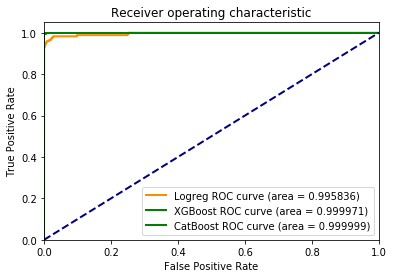

In [26]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

y_score_logreg = logreg.predict_proba(X_test)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

y_score_xgb = bst.predict(dtest)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

y_score_cat = catbst.predict_proba(X_test)[:, 1]

fpr_cat, tpr_cat, _ = roc_curve(y_test, y_score_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)

plt.figure()
lw = 2
plt.plot(fpr_logreg, tpr_logreg, color='darkorange',
         lw=lw, label='Logreg ROC curve (area = %0.6f)' % roc_auc_logreg)
plt.plot(fpr_xgb, tpr_xgb, color='green',
         lw=lw, label='XGBoost ROC curve (area = %0.6f)' % roc_auc_xgb)
plt.plot(fpr_cat, tpr_cat, color='green',
         lw=lw, label='CatBoost ROC curve (area = %0.6f)' % roc_auc_cat)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

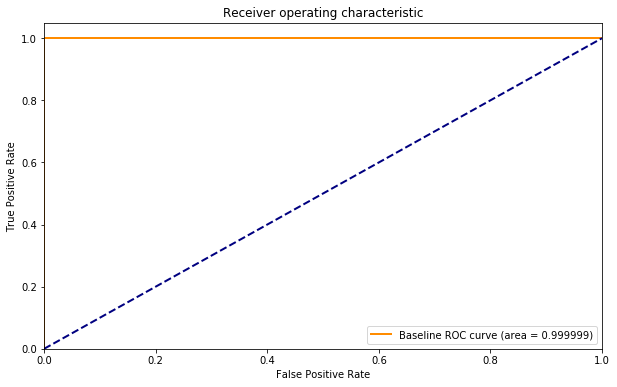

In [34]:
fpr_base, tpr_base, _ = roc_curve(y_test, y_score_base)
roc_auc_base = auc(fpr_base, tpr_base)

plt.figure(figsize=(10, 6))
lw = 2
plt.plot(fpr_cat, tpr_cat, color='darkorange',
         lw=lw, label='Baseline ROC curve (area = %0.6f)' % roc_auc_cat)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

(0.0, 1.0)

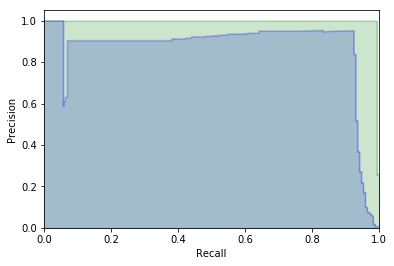

In [24]:
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_score_logreg)

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_score_xgb)

plt.step(recall_logreg, precision_logreg, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_logreg, precision_logreg, step='post', alpha=0.2,
                 color='b')

plt.step(recall_xgb, precision_xgb, color='g', alpha=0.2,
         where='post')
plt.fill_between(recall_xgb, precision_xgb, step='post', alpha=0.2,
                 color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#           average_precision))

In [14]:
y_pred = logreg.predict_proba(X_test)[:, 1].reshape(-1, 1)

np.savetxt("test_kdd99_logreg.txt", np.hstack((y_pred, X_test)), fmt="%g")

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:266: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [15]:
coef = np.hstack((logreg.intercept_, logreg.coef_.reshape(-1)))
np.savetxt("data.txt", coef)

In [16]:
!head logreg_coef.txt

-4.534544288850625438e-02
5.292506973677488236e-04
9.673296999840219848e-08
-1.484107917196090809e-01
-7.734815110430924741e-03
9.004152836814331428e-09
-2.000986168097299272e-03
-4.826859220296806473e-06
-6.502061334503075418e-06
1.047676510434300991e-07


In [17]:
logreg.predict_proba(X_test[:10])

array([[1.00000000e+00, 6.03168843e-41],
       [9.99894533e-01, 1.05467460e-04],
       [9.99663678e-01, 3.36321665e-04],
       [9.99999901e-01, 9.91401537e-08],
       [1.00000000e+00, 9.48725009e-98],
       [1.00000000e+00, 9.48725009e-98],
       [9.99999999e-01, 6.08635619e-10],
       [1.00000000e+00, 9.48725009e-98],
       [9.99918561e-01, 8.14393553e-05],
       [9.99998990e-01, 1.00950563e-06]])

In [18]:
catbst.save_model('model.cbm')

In [19]:
y_pred_catb = catbst.predict_proba(X_test)[:, 1].reshape(-1, 1)

np.savetxt("test_kdd99_catboost.txt", np.hstack((y_pred_catb, X_test)), fmt="%g")